<a href="https://colab.research.google.com/github/maramatef111/fraud-detection-app/blob/main/analysis_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [4]:
df = pd.read_csv('AIML Dataset.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913451 entries, 0 to 913450
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            913451 non-null  int64  
 1   type            913451 non-null  object 
 2   amount          913451 non-null  float64
 3   nameOrig        913451 non-null  object 
 4   oldbalanceOrg   913451 non-null  float64
 5   newbalanceOrig  913451 non-null  float64
 6   nameDest        913450 non-null  object 
 7   oldbalanceDest  913450 non-null  float64
 8   newbalanceDest  913450 non-null  float64
 9   isFraud         913450 non-null  float64
 10  isFlaggedFraud  913450 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 76.7+ MB


In [8]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [9]:
df['isFraud'].value_counts()

,count
isFraud,
0.0,912950
1.0,500


In [10]:
df['isFlaggedFraud'].value_counts()

,count
isFlaggedFraud,
0.0,913450


In [18]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [17]:
df=df.dropna()

In [24]:
df.shape[0]

913450

In [29]:
round((df["isFraud"].value_counts()[1] / df.shape[0]) * 100, 2)

np.float64(0.05)

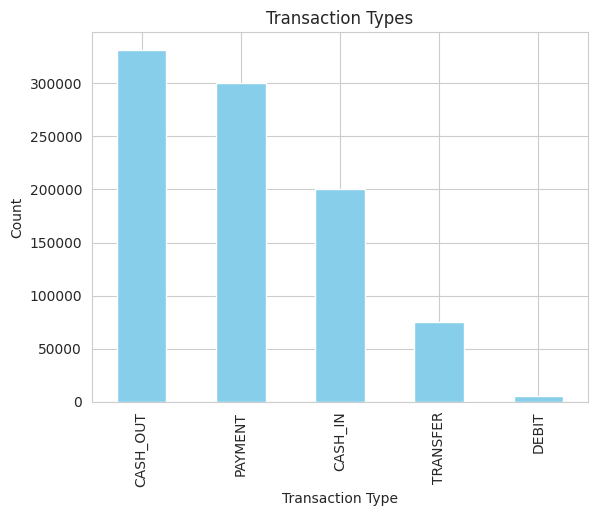

In [32]:
df["type"].value_counts().plot(kind='bar', title = "Transaction Types", color ="skyblue")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

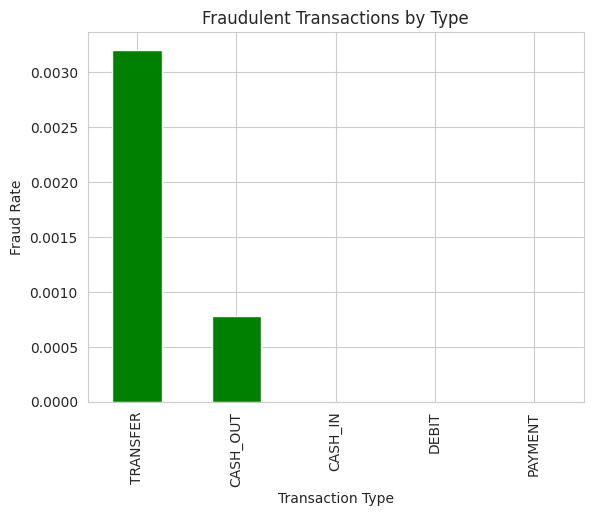

In [33]:
fraud_by_type = df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
fraud_by_type.plot(kind="bar", title="Fraudulent Transactions by Type", color="Green")
plt.xlabel("Transaction Type")
plt.ylabel("Fraud Rate")
plt.show()

In [34]:
df["amount"].describe().astype(int)

,amount
count,913450
mean,163011
std,262700
min,0
25%,13056
50%,81062
75%,220459
max,10000000


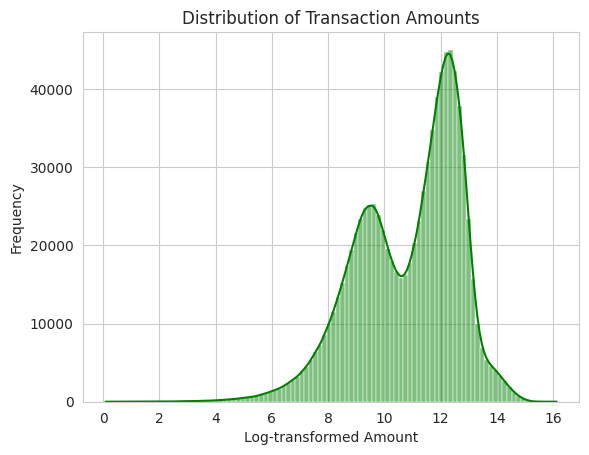

In [36]:
sns.histplot(np.log1p(df["amount"]), bins=100 , kde = True , color="green")
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Log-transformed Amount")
plt.ylabel("Frequency")
plt.show()

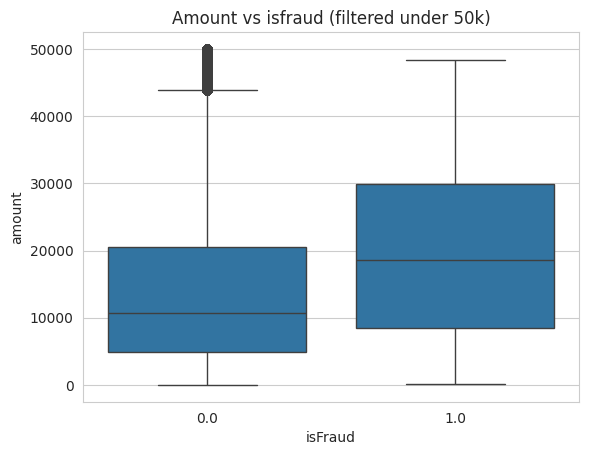

In [37]:
sns.boxplot(data=df[df['amount']< 50000], x="isFraud", y ="amount")
plt.title("Amount vs isfraud (filtered under 50k)")
plt.show()

In [38]:
df["balanceDiffOrig"] = df["oldbalanceOrg"] - df["newbalanceOrig"]
df["balanceDiffDest"] = df["oldbalanceDest"] - df["newbalanceDest"]

In [41]:
(df["balanceDiffOrig"] < 0).sum()

np.int64(200442)

In [43]:
(df["balanceDiffDest"] < 0).sum()

np.int64(412440)

In [44]:
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0,1864.28,0.0


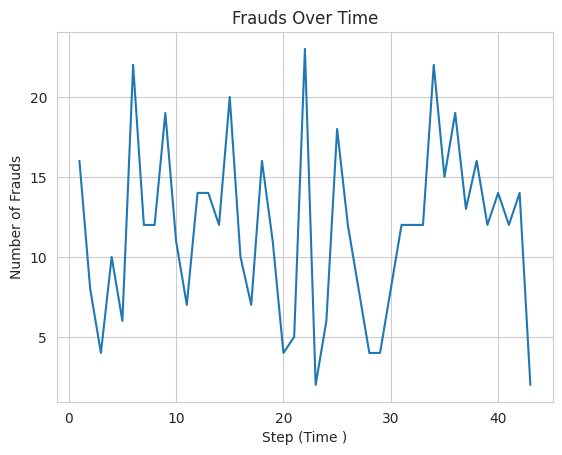

In [46]:
fraud_per_step = df[df["isFraud"]==1]["step"].value_counts().sort_index()
plt.plot(fraud_per_step.index , fraud_per_step.values ,label= "frauds per Step" )
plt.xlabel("Step (Time )")
plt.ylabel("Number of Frauds")
plt.title("Frauds Over Time")
plt.grid(True)
plt.show()


In [48]:
df.drop(columns="step", inplace=True)

In [49]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0,181.00,21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0,11668.14,0.0


In [52]:
top_senders = df["nameOrig"].value_counts().head(10)
top_senders

,count
nameOrig,
C44568807,2
C1028315484,2
C379332928,2
C1232570123,2
C1830547216,2
C457997071,2
C1378765159,2
C1250194175,2
C2088169633,2


In [51]:
top_receivers = df["nameDest"].value_counts().head(10)
top_receivers

,count
nameDest,
C985934102,96
C1286084959,96
C248609774,88
C665576141,87
C1590550415,87
C2083562754,86
C1360767589,81
C977993101,81
C451111351,80


In [54]:
fraud_users = df[df["isFraud"]==1]["nameOrig"].value_counts().head()
fraud_users

,count
nameOrig,
C756162144,1
C1305486145,1
C840083671,1
C1420196421,1
C866414395,1


In [58]:
fraud_types = df[df["type"].isin(["TRANSFER", "CASH_OUT"])]


In [59]:
fraud_types["type"].value_counts()

,count
type,
CASH_OUT,331404
TRANSFER,75476


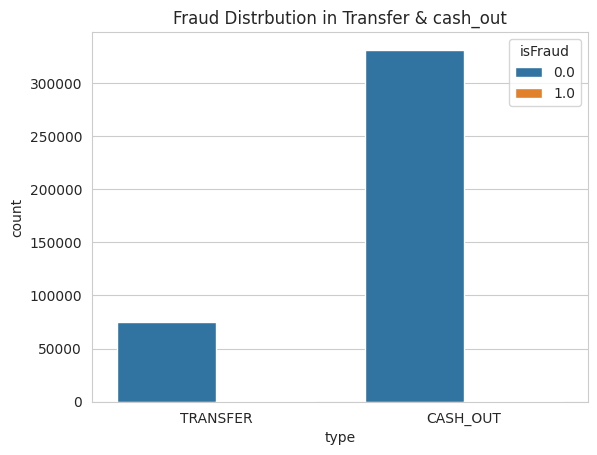

In [60]:
sns.countplot(data=fraud_types , x= "type" , hue="isFraud")
plt.title("Fraud Distrbution in Transfer & cash_out")
plt.show()

In [61]:
df.columns

Index(['type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'balanceDiffOrig', 'balanceDiffDest'],
      dtype='object')

In [62]:
corr = df[["amount","oldbalanceOrg" ,"newbalanceOrig" , "oldbalanceDest","newbalanceDest","isFraud"]].corr()

In [63]:
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.004580,-0.006399,0.213901,0.311977,0.072784
oldbalanceOrg,-0.004580,1.000000,0.999233,0.092170,0.062520,0.000868
newbalanceOrig,-0.006399,0.999233,1.000000,0.093896,0.062223,-0.006747
oldbalanceDest,0.213901,0.092170,0.093896,1.000000,0.976846,-0.004918
newbalanceDest,0.311977,0.062520,0.062223,0.976846,1.000000,-0.000740
isFraud,0.072784,0.000868,-0.006747,-0.004918,-0.000740,1.000000


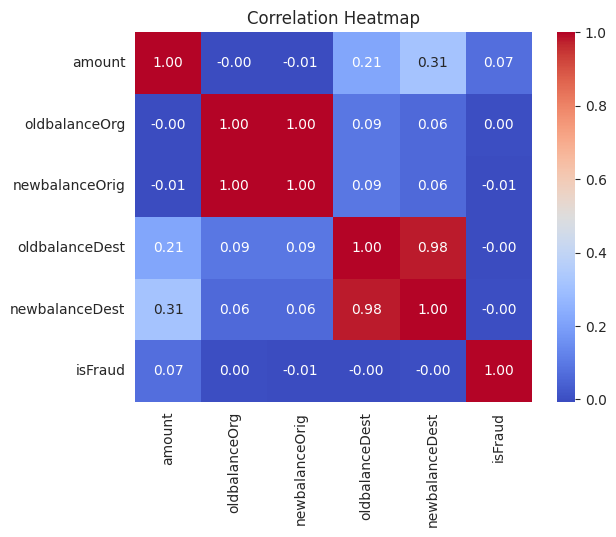

In [64]:
sns.heatmap(corr,annot=True ,cmap ="coolwarm" ,fmt=".2f" )
plt.title("Correlation Heatmap")
plt.show()

In [65]:
zero_after_transfer = df [
    (df["oldbalanceOrg"]>0) &
    (df["newbalanceOrig"]==0)&
    (df['type'].isin(["TRANSFER","CASH_OUT"]))
]

In [66]:
len(zero_after_transfer)

171802

In [67]:
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1.0,0.0,181.0,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1.0,0.0,181.0,21182.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0.0,0.0,15325.0,-46430.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0.0,0.0,705.0,22425.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0.0,0.0,10835.0,-2712905.89


In [68]:
df["isFraud"].value_counts()

,count
isFraud,
0.0,912950
1.0,500


In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [70]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0,181.00,21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0,11668.14,0.0


In [71]:
df_model=df.drop(["nameDest","nameOrig","isFlaggedFraud"],axis= 1)

In [72]:
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0.0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0.0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1.0,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1.0,181.00,21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0.0,11668.14,0.0


In [77]:
categorical =["type"]
numerical =["amount","oldbalanceOrg" ,"newbalanceOrig" , "oldbalanceDest","newbalanceDest"]

In [76]:
y= df_model["isFraud"]
x=df_model.drop("isFraud",axis=1)

In [78]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, stratify=y)

In [79]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical),
        ('cat', OneHotEncoder(drop="first"), categorical)
    ],
    remainder= "drop"
    )

In [80]:
pipeline = Pipeline([
    ('prep', preprocessor),
    ('clf', LogisticRegression(class_weight="balanced", max_iter=1000))
])

In [81]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [82]:
y_pred=pipeline.predict(x_test)

In [84]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95    273885
         1.0       0.01      0.97      0.01       150

    accuracy                           0.90    274035
   macro avg       0.50      0.93      0.48    274035
weighted avg       1.00      0.90      0.95    274035



In [85]:
confusion_matrix(y_test,y_pred)

array([[246647,  27238],
       [     5,    145]])

In [86]:
pipeline.score(x_test,y_test)

0.9005856916087361

In [87]:
import joblib
joblib.dump(pipeline,"fraud_detection_pipeline.pkl")

['fraud_detection_pipeline.pkl']